## 데이터셋 설명
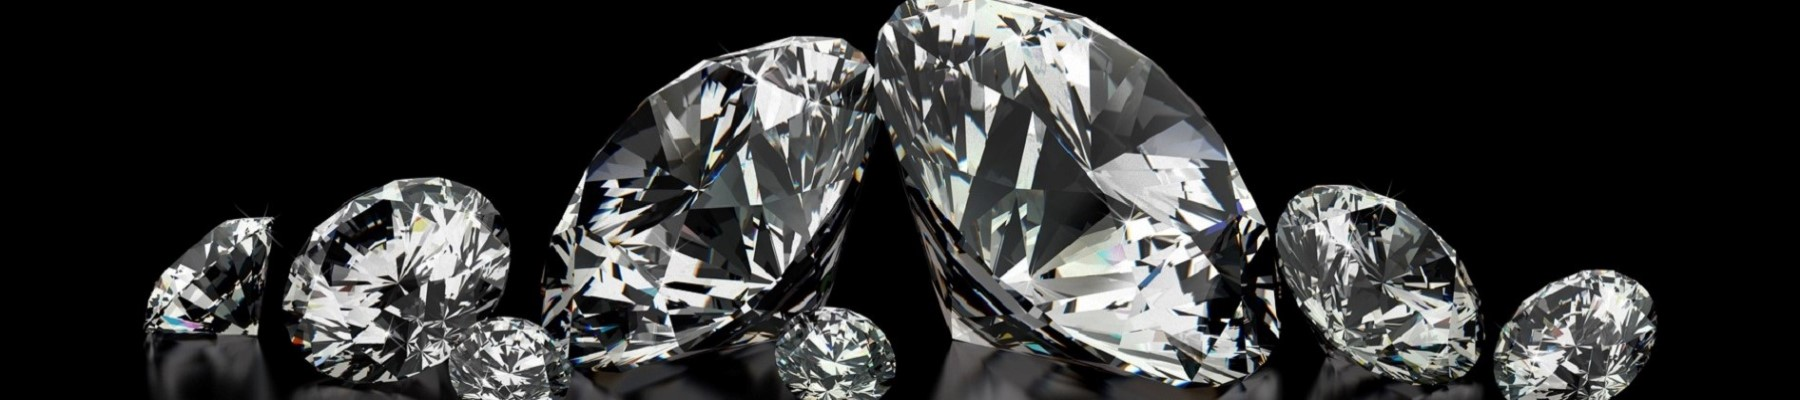

seaborn 라이브러리의 diamonds 데이터셋은 10개의 칼럼, 약 54000개의 행을 가지고 있습니다.


### 칼럼 설명
* **price**: The price of the diamond in US dollars ($326--$18,823).
<br>가격: 다이아몬드의 가격 (달러로 326--18,823).
<br>

* **carat**: The weight of the diamond (0.2--5.01).
<br>캐럿: 다이아몬드의 무게 (0.2--5.01).
<br>
* **cut**: The quality of the cut (Fair, Good, Very Good, Premium, Ideal).
<br>컷: 컷팅의 품질 (Fair, Good, Very Good, Premium, Ideal).
<br>
* **color**: Diamond color, from J (worst) to D (best).
<br>색상: 다이아몬드의 색상, J (최악)에서 D (최고)까지.
<br>
* **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
<br>선명도: 다이아몬드의 선명도 측정 (I1 (최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (최고)).
<br>
* **x**: Length in mm (0--10.74).
<br>x (길이): 밀리미터 단위의 길이 (0--10.74).
<br>
* **y**: Width in mm (0--58.9).
<br>y (너비): 밀리미터 단위의 너비 (0--58.9).
<br>
* **z**: Depth in mm (0--31.8).
<br>z (깊이): 밀리미터 단위의 깊이 (0--31.8).
<br>
* **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79).
<br>깊이 비율: 총 깊이 비율 = z / (x, y의 평균) = 2 * z / (x + y) (43--79).
<br>
* **table**: Width of top of diamond relative to widest point (43--95).
<br>테이블: 다이아몬드 상단의 폭이 가장 넓은 지점에 대한 상대적 폭 (43--95).
<br>


https://www.kaggle.com/datasets/shivam2503/diamonds
더 자세한 내용은 위 링크에서 확인할 수 있습니다.

## 데이터셋 다운로드

```
수치형: cut, color, clarity
범주형: price, carat, x, y, z, depth, table

In [1]:
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
diamonds

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

## 데이터 살펴보기
데이터의 **칼럼별 자료형**을 살펴보세요!

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

## 가설 수립
데이터셋을 살펴보고, 다음의 자료형에 맞는 적절한 칼럼 조합을 하나씩 말해주세요.
<br>ex) carat - cut

* 수치형 - 수치형: carat - depth
* 범주형 - 수치형: cut - carat
* 범주형 - 범주형: cut - color

```
수치형: carat, depth, table, price, x, y, z
범주형: cut, color, clarity

## 가설 검정
4번에서 찾은 조합을 가지고, 데이터셋을 살펴보고 적절한 가설을 세운 후 검정 후 평가해봅시다.

### 수치형 - 수치형 (carat - depth)
* 귀무가설: 다이아몬드 무게와 다이아몬드 깊이 사이에는 상관관계가 없다.
* 대립가설: 다이아몬드 무게와 다이아몬드 깊이 사이에는 상관관계가 없다.

#### 시각화

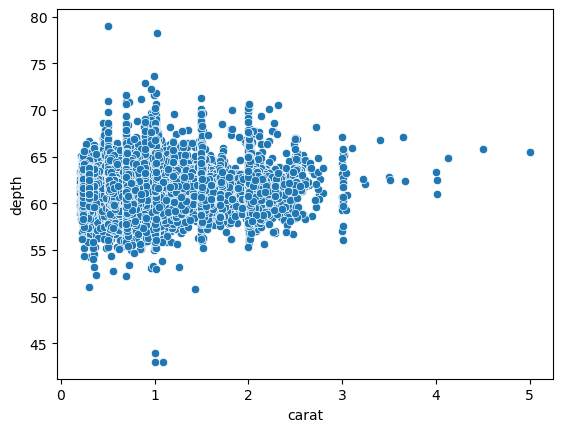

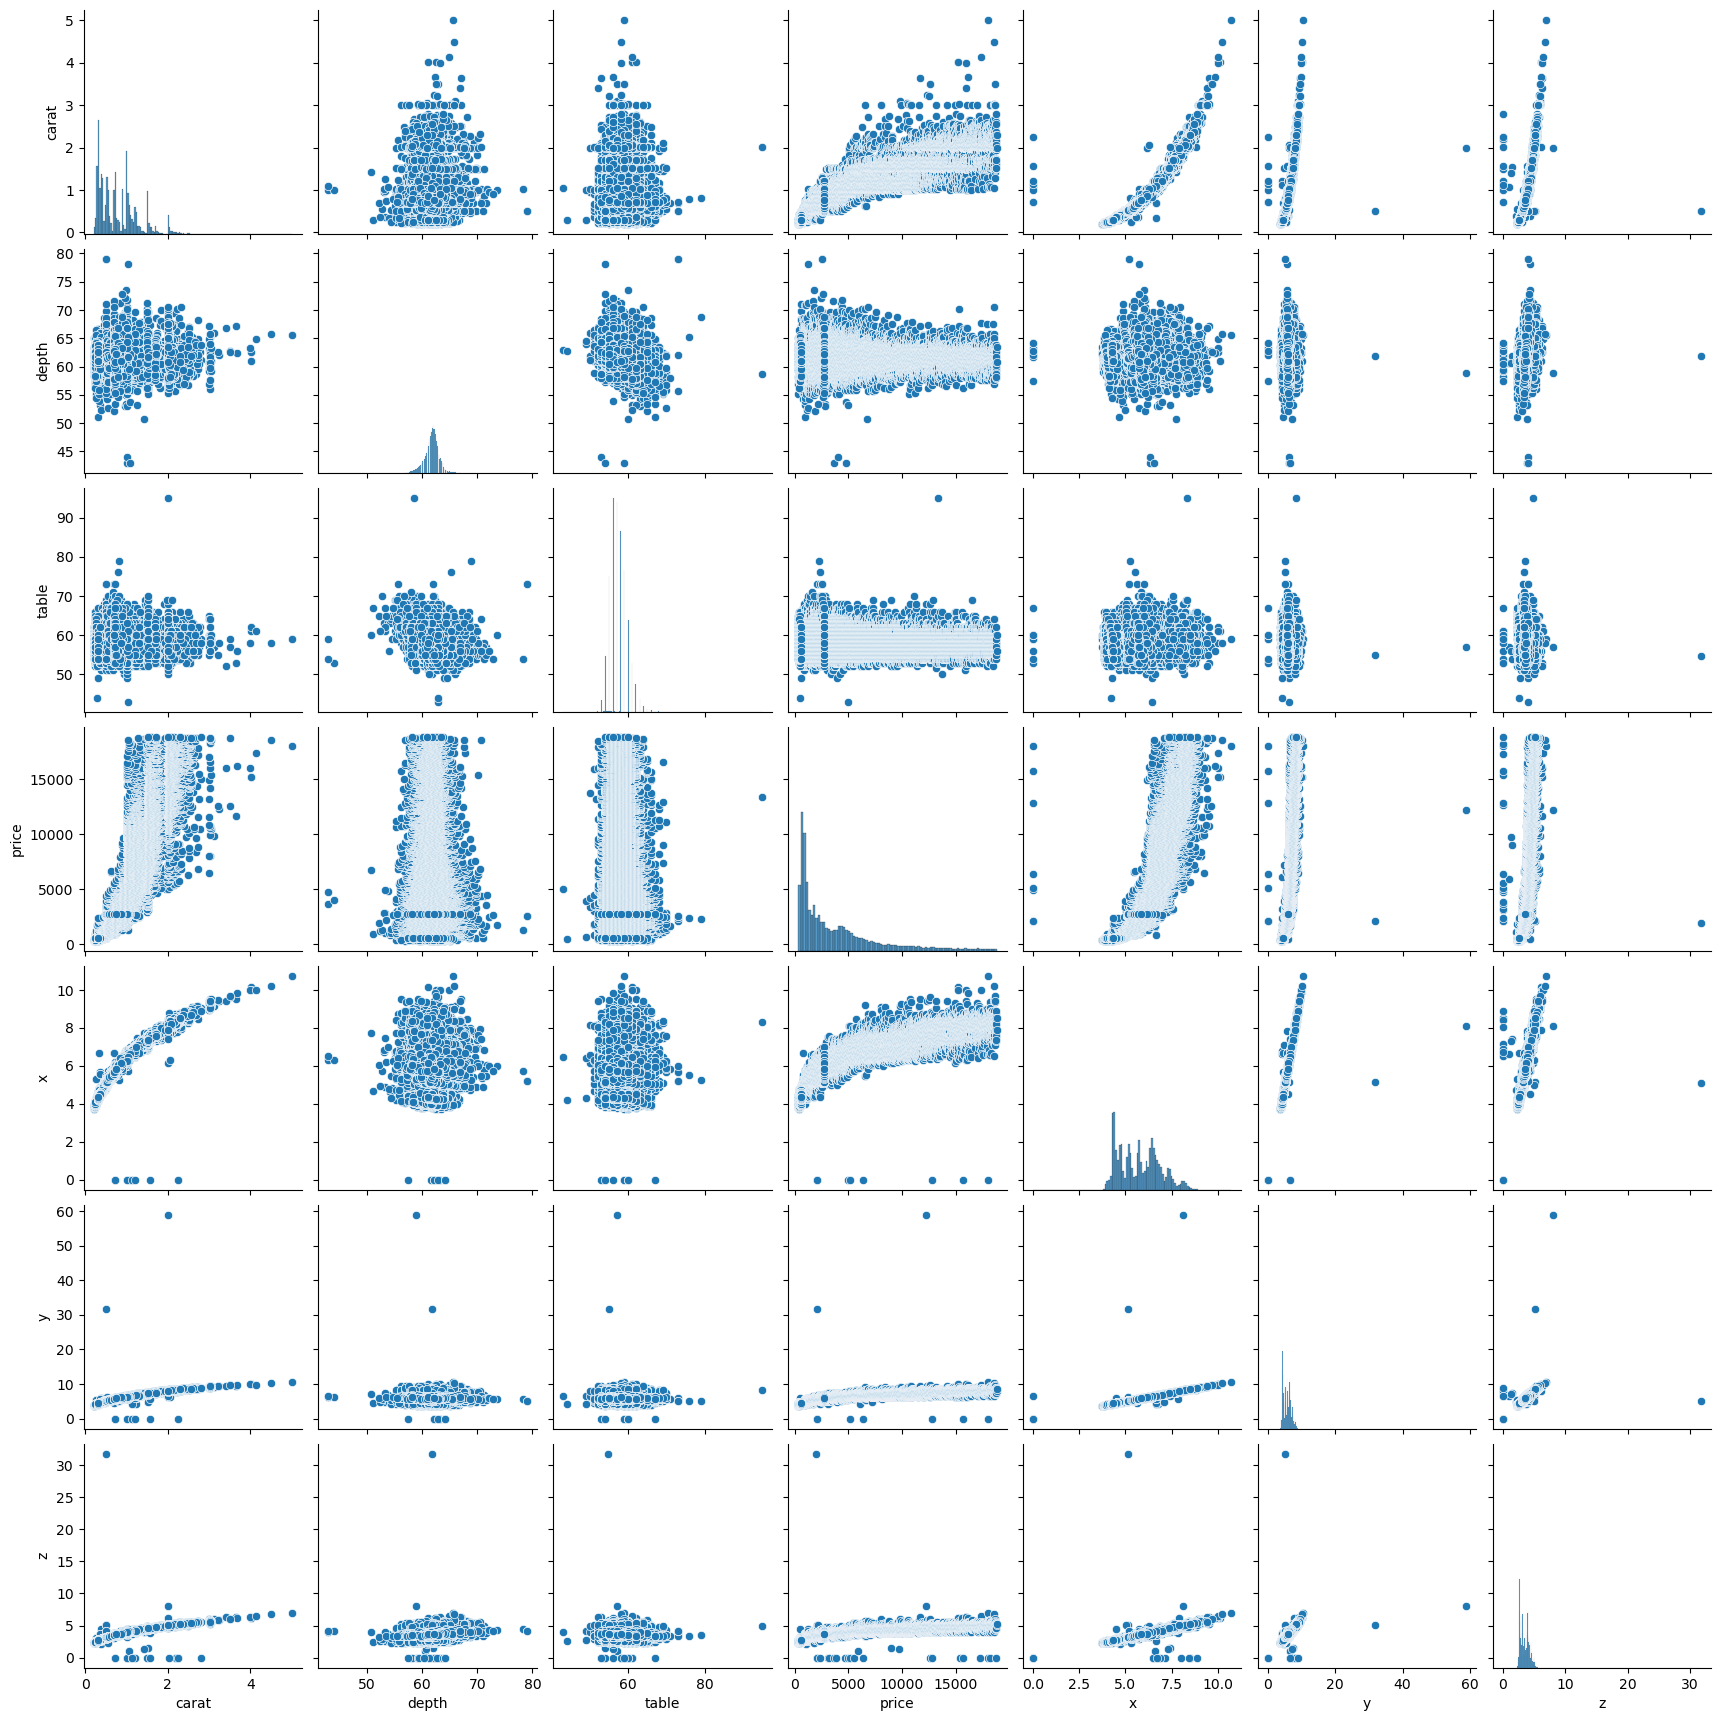

In [24]:
# 시각화 코드를 작성해주세요
import seaborn as sns
import matplotlib.pyplot as plt
# plt.scatter('colx', 'coly', data = df)
# sns.scatterplot('colx', 'coly', data = df)

sns.scatterplot(x=diamonds['carat'], y=diamonds['depth'])
plt.show()
sns.pairplot(diamonds)

#### 수치화

In [27]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import scipy.stats as spst
spst.pearsonr(diamonds['carat'], diamonds['depth'])

PearsonRResult(statistic=0.02822431427904821, pvalue=5.5178702903402964e-11)

#### 검정 결과 해석
- p-값이 0.05 이상이므로, 대립가설을 기각. carat과 depth 사이에는 통계적으로 유의미한 선형 상관관계가 있음.
- 절대값이 작으므로(절대값 2를 기준으로 함) 그 상관관계의 정도가 약함.

### 범주형 - 수치형 (cut - carat)
* 귀무가설: 다이아몬드의 컷 등급과 다이아몬드의 무게는 상관관계가 없다.
* 대립가설: 다이아몬드의 컷 등급과 다이아몬드의 무게는 상관관계가 있다.

#### 시각화

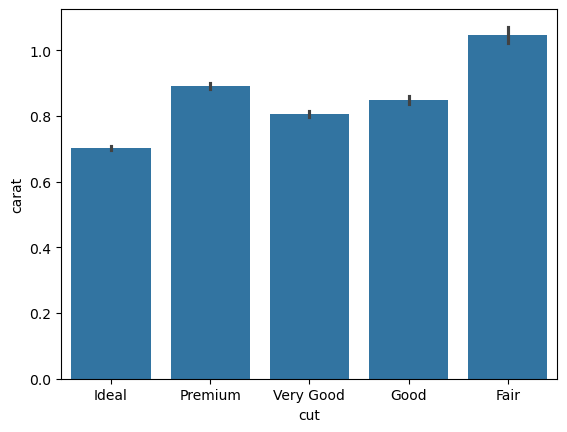

In [46]:
# 시각화 코드를 작성해주세요
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='cut', y='carat', data=diamonds)
plt.show()

#### 수치화

In [28]:
diamonds['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [41]:
# 여기에 검정을 수행하는 코드를 적어주세요.
Ideal = diamonds.loc[diamonds['cut'] == 'Ideal', 'carat']
Premium = diamonds.loc[diamonds['cut'] == 'Premium', 'carat']
Good = diamonds.loc[diamonds['cut'] == 'Good', 'carat']
Very_Good = diamonds.loc[diamonds['cut'] == 'Very Good', 'carat']
Fair = diamonds.loc[diamonds['cut'] == 'Fair', 'carat']

result = spst.f_oneway(Ideal, Premium, Good, Very_Good, Fair)
print(result)

F_onewayResult(statistic=495.69425927416324, pvalue=0.0)


#### 검정 결과 해석
- p-값이 0.05 이하이므로, 귀무가설을 기각. cut과 carat 사이에는 통계적으로 유의미한 선형 상관관계가 없음.
- 절대값이 크므로(절대값 2를 기준으로 함) 그 상관관계의 정도가 강함.

### 범주형 - 범주형 (cut - color)
* 귀무가설: 다이아몬드의 컷 등급과 색깔은 상관관계가 없다.
* 대립가설: 다이아몬드의 컷 등급과 색깔은 상관관계가 있다.

#### 시각화

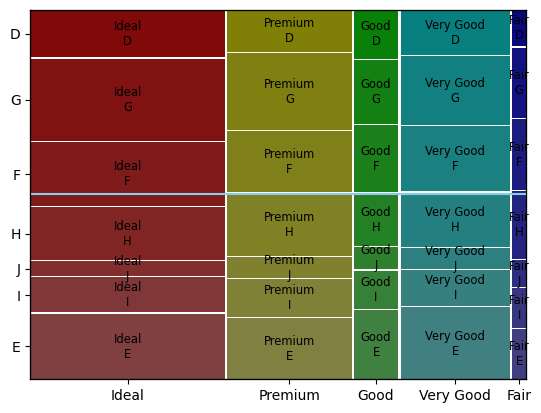

In [52]:
# 시각화 코드를 작성해주세요
from statsmodels.graphics.mosaicplot import mosaic

mosaic(diamonds, ['cut','color'])
plt.axhline(0.5, color = 'skyblue')

#### 수치화

In [56]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import pandas as pd
table = pd.crosstab(diamonds['cut'], diamonds['color'])

spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=310.3179005211542, pvalue=1.3945120919852248e-51, dof=24, expected_freq=array([[2706.85993697, 3914.25930664, 3812.37749351, 4511.56640712,
        3317.7512792 , 2166.28702262, 1121.89855395],
       [1732.18437152, 2504.82808676, 2439.63147942, 2887.05917686,
        2123.1083426 , 1386.25884316,  717.92969967],
       [1517.52966259, 2194.42628847, 2137.30893585, 2529.29076752,
        1860.00978865, 1214.47170931,  628.96284761],
       [ 616.2059696 ,  891.06566555,  867.87267334, 1027.04026696,
         755.27296997,  493.1466815 ,  255.39577308],
       [ 202.22005933,  292.42065258,  284.80941787,  337.04338154,
         247.85761958,  161.83574342,   83.8131257 ]]))

#### 검정 결과 해석
- p-값이 0.05 이상이므로, 대립가설을 기각. cut과 color 사이에는 통계적으로 유의미한 선형 상관관계가 있음.
- 절대값이 크므로(절대값 2를 기준으로 함) 그 상관관계의 정도가 강함.

고생 많으셨어요:) 회귀 세션도 화이팅!
```python
ㄴ 화이팅!!!!!!!!!!!!!!!!!!